In [9]:
import numpy as np
import pandas as pd

# 参数设定
"""
P1,P2:零配件1和2的次品率
C1,C2: 零配件1和2的购买单价。
d1,d2: 零配件1和2的检测成本。·pf:成品的次品率
a:装配成本。
df:成品的检测成本。
"""
params = {
    'p1': 0.20, 'p2': 0.20, 'c1': 4, 'c2': 18, 'd1': 2, 'd2': 3,
    'pf': 0.20, 'a': 6, 'df': 3, 's': 56, 'l': 6, 'r': 5
}

# 决策变量
decisions = [0, 1]

# 总成本计算函数
def calculate_total_cost(D1, D2, C, R, params):
    cost_parts = (params['c1'] + params['d1'] * D1) + (params['c2'] + params['d2'] * D2)
    cost_assembly = params['a'] + params['df'] * C
    cost_rework = params['r'] * R * params['pf'] * C
    loss_replacement = params['l'] * params['pf']
    total_cost = cost_parts + cost_assembly + cost_rework + loss_replacement
    return total_cost

# 遍历所有可能的决策组合并打印
min_cost = np.inf
best_decision = None

print("Decision Combinations and Corresponding Total Costs:")

for D1 in decisions:
    for D2 in decisions:
        for C in decisions:
            for R in decisions:
                total_cost = calculate_total_cost(D1, D2, C, R, params)
                print(f"D1: {D1}, D2: {D2}, D3: {C}, D4: {R}, Total Cost: {total_cost}")
                if total_cost < min_cost:
                    min_cost = total_cost
                    best_decision = (D1, D2, C, R)

print(f"\nBest Decision: {best_decision}, Minimum Total Cost: {min_cost}")


Decision Combinations and Corresponding Total Costs:
D1: 0, D2: 0, D3: 0, D4: 0, Total Cost: 29.2
D1: 0, D2: 0, D3: 0, D4: 1, Total Cost: 29.2
D1: 0, D2: 0, D3: 1, D4: 0, Total Cost: 32.2
D1: 0, D2: 0, D3: 1, D4: 1, Total Cost: 33.2
D1: 0, D2: 1, D3: 0, D4: 0, Total Cost: 32.2
D1: 0, D2: 1, D3: 0, D4: 1, Total Cost: 32.2
D1: 0, D2: 1, D3: 1, D4: 0, Total Cost: 35.2
D1: 0, D2: 1, D3: 1, D4: 1, Total Cost: 36.2
D1: 1, D2: 0, D3: 0, D4: 0, Total Cost: 31.2
D1: 1, D2: 0, D3: 0, D4: 1, Total Cost: 31.2
D1: 1, D2: 0, D3: 1, D4: 0, Total Cost: 34.2
D1: 1, D2: 0, D3: 1, D4: 1, Total Cost: 35.2
D1: 1, D2: 1, D3: 0, D4: 0, Total Cost: 34.2
D1: 1, D2: 1, D3: 0, D4: 1, Total Cost: 34.2
D1: 1, D2: 1, D3: 1, D4: 0, Total Cost: 37.2
D1: 1, D2: 1, D3: 1, D4: 1, Total Cost: 38.2

Best Decision: (0, 0, 0, 0), Minimum Total Cost: 29.2


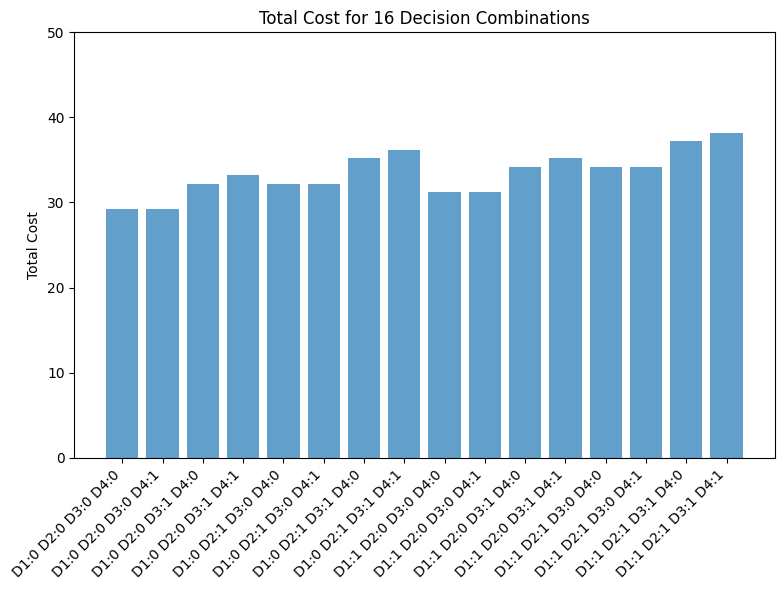

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data: New combinations of D1, D2, D3, D4 and their corresponding Total Costs
decisions = [
    (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1),
    (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1),
    (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1),
    (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)
]
costs = [
    29.2, 29.2, 32.2, 33.2, 32.2, 32.2, 35.2, 36.2,
    31.2, 31.2, 34.2, 35.2, 34.2, 34.2, 37.2, 38.2
]

# Convert decisions into string labels
labels = ['D1:{} D2:{} D3:{} D4:{}'.format(*d) for d in decisions]

# Create the bar plot
x_pos = np.arange(len(decisions))

# Adjusting the figure size and font size for better visualization
plt.figure(figsize=(8, 6))
plt.bar(x_pos, costs, align='center', alpha=0.7)
plt.xticks(x_pos, labels, rotation=45, ha='right', fontsize=10)  # Adjust horizontal alignment (ha)
plt.ylim(0, 50)  # Fix the y-axis height to 50
plt.ylabel('Total Cost')
plt.title('Total Cost for 16 Decision Combinations')

# Highlight the best decision with minimum total cost
"""
min_cost = min(costs)
min_cost_index = costs.index(min_cost)
plt.bar(min_cost_index, min_cost, color='red', label='Best Decision (Minimum Cost)')

# Add legend
plt.legend()
"""
# Adjust layout and show the plot
plt.tight_layout()
plt.show()
